# 1. 載入所需套件

In [0]:
# 從 sklearn 載入手寫辨識資料集
from sklearn.datasets import load_digits

# 載入我們會用到的模型，K-Means分群模型
from sklearn.cluster import KMeans

# 載入用來做資料視覺化的畫圖套件
import matplotlib.pyplot as plt

# 載入做數學運算的套件 Numpy
import numpy as np

# 2. 載入資料集，觀察資料集

In [0]:
# 載入手寫字資料庫到digits變數中
digits = load_digits()

# 觀察有哪些 key 在資料集內
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [0]:
# 觀察資料筆數
print("資料筆數:")
print(digits.data.shape, "\n")

# 觀察我們資料的欄位名稱
print("資料的欄位名稱，分別是:")
print(digits.target_names, "\n")

# 觀察我們第一筆的資料內容
print("第一筆的資料內容:")
print(digits.data[0], "\n")

# 觀察我們第一筆的影像內容
print("第一筆的影像內容:")
print(digits.images[0], "\n")

# 觀察我們第一筆的預測目標
print("第一筆的預測目標:")
print(digits.target[0], "\n")

資料筆數:
(1797, 64) 

資料的欄位名稱，分別是:
[0 1 2 3 4 5 6 7 8 9] 

第一筆的資料內容:
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.] 

第一筆的影像內容:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]] 

第一筆的預測目標:
0 



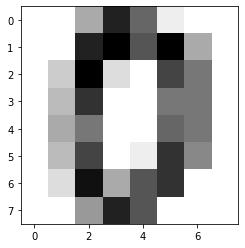

In [0]:
# 試試看用資料視覺畫的套件來畫出 image 影像資料
# cmap 是指取用哪種顏色顯示, plt.cm.binary 是顯示灰階的顏色庫
plt.imshow(digits.images[0] , cmap=plt.cm.binary)

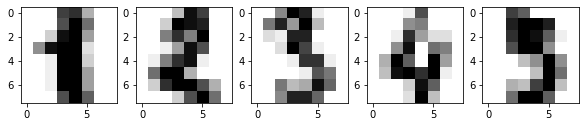

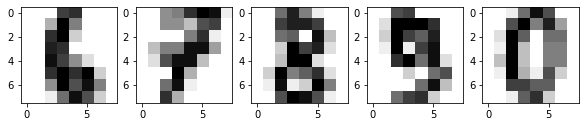

In [0]:
# 一次看前十筆的影像資料

# 先畫第一列
# figsize 代表畫布的大小, 這裡是希望設定成長=10, 寬=10, 單位是英寸
plt.figure(figsize=(10,10))

for i in range(1,6):
  plt.subplot(1,5,i)
  plt.imshow(digits.images[i], cmap=plt.cm.binary)
plt.show()

# 再畫第二列
plt.figure(figsize=(10,10))

for i in range(6,11):
  plt.subplot(2,5,i)
  plt.imshow(digits.images[i], cmap=plt.cm.binary)
plt.show()

# 3. 訓練模型及驗證模型

### 這裡因為 digits 有十種數字分類，所以我們分成十群

In [0]:
# 載入 K-means 模型，設定將資料分成十群
estimator = KMeans(n_clusters=10, random_state=18)

# 進行模型訓練，因為K-means是非監督式學習，故不用放入label的標籤資料
estimator.fit(digits.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=18, tol=0.0001, verbose=0)

In [0]:
# 這邊分別取出 K-means模型幫我們分好的其中三群出來看
# 分別就是 label為0,1,2的三群，並把他們的位置(index)存到變數 c_0, c_1, c_2內
c_0 = np.where(estimator.labels_== 0 )[0]
c_1 = np.where(estimator.labels_== 1 )[0]
c_2 = np.where(estimator.labels_== 2 )[0]

# 印出這三個變數的前十筆資料來看
# 他們代表著不同群集裡，分別在 digits 裡面的排序位置
print(c_0[0:10])
print(c_1[0:10])
print(c_2[0:10])

[ 3 13 23 45 59 60 62 63 83 89]
[ 0 10 20 30 36 48 49 55 72 78]
[ 15  25  32  33  35  46  71  74 102 109]


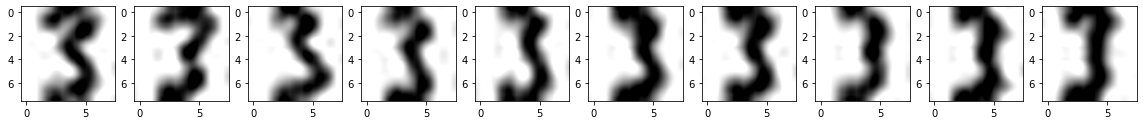

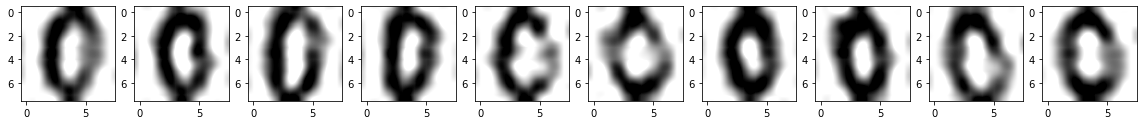

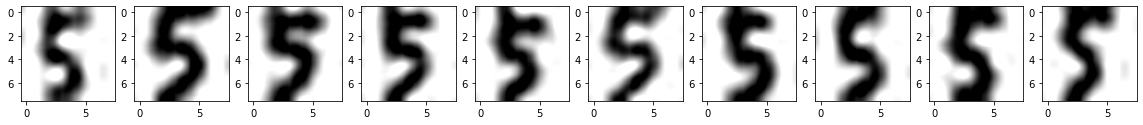

In [0]:
# 把這三個集群分成三列顯示出來看看
# 這下面有一個方法 interpolation='sinc'，他會讓影像用sin波取內插取值，讓影像更清晰

# 先畫第一列
plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(1,10,i)
  plt.imshow(digits.images[c_0[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()

# 再畫第二列
plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(2,10,i)
  plt.imshow(digits.images[c_1[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()

# 再畫第三列
plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(3,10,i)
  plt.imshow(digits.images[c_2[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()



# Q. 那假設只分三群呢？

In [0]:
# 載入 K-means 模型，設定將資料分成三群
estimator = KMeans(n_clusters= 3, random_state=18)
estimator.fit(digits.data)

c_0 = np.where(estimator.labels_== 0 )[0]
c_1 = np.where(estimator.labels_== 1 )[0]
c_2 = np.where(estimator.labels_== 2 )[0]

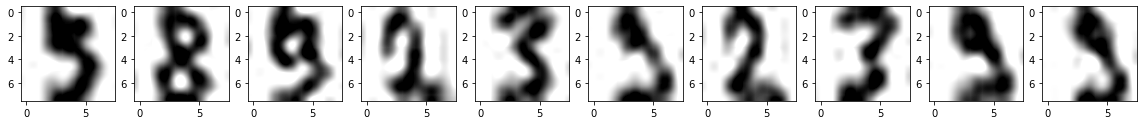

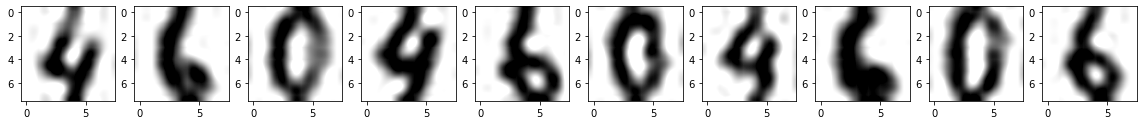

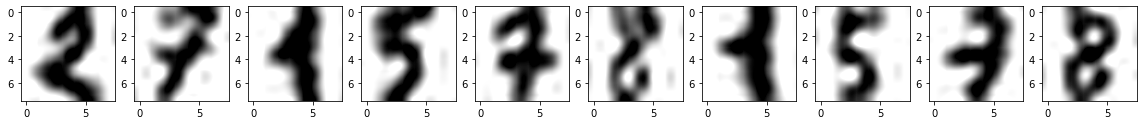

In [0]:
# 把這三個集群分成三列顯示出來看看

# 先畫第一列
plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(1,10,i)
  plt.imshow(digits.images[c_0[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()

# 再畫第二列
plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(2,10,i)
  plt.imshow(digits.images[c_1[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()

# 再畫第三列
plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(3,10,i)
  plt.imshow(digits.images[c_2[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()